# Super Store Data Analysis

![store](https://i.ytimg.com/vi/hT1wgTRVRxg/maxresdefault.jpg?sqp=-oaymwEmCIAKENAF8quKqQMa8AEB-AHUBoAC4AOKAgwIABABGGUgWyhIMA8=&rs=AOn4CLCApbjU7JYbQi-TffAp8esnBH9bZg)
source data= [kaggle](https://www.kaggle.com/datasets/jr2ngb/superstore-data)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import folium

Read Data

In [6]:
df = pd.read_excel('Module2_Challenge.xlsx')

In [7]:
df.head(2)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True


Cek Tipe Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8047 non-null   object        
 1   Order Date     8047 non-null   datetime64[ns]
 2   Customer Name  8047 non-null   object        
 3   Country        8047 non-null   object        
 4   State          8047 non-null   object        
 5   City           8047 non-null   object        
 6   Region         8047 non-null   object        
 7   Segment        8047 non-null   object        
 8   Ship Mode      8047 non-null   object        
 9   Category       8047 non-null   object        
 10  Sub-Category   8047 non-null   object        
 11  Product Name   8047 non-null   object        
 12  Discount       8047 non-null   float64       
 13  Sales          8047 non-null   int64         
 14  Profit         8047 non-null   int64         
 15  Quantity       8047 n

Tambah Data Tahun & Bulan

In [8]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df.head(2)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False,2011,1
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True,2011,1


Tambah Data Cost & Cost per Quantity

In [9]:
df['Cost'] = df['Sales'] - df['Profit']
df['Cost per Quantity'] = df['Cost']//df['Quantity']
df.head(5)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month,Cost,Cost per Quantity
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,"Enermax Note Cards, Premium",0.5,45,-26,3,False,2011,1,71,23
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,...,"Dania Corner Shelving, Traditional",0.0,854,290,7,True,2011,1,564,80
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,...,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True,2011,1,119,39
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,...,"Boston Markers, Easy-Erase",0.5,27,-22,2,True,2011,1,49,24
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,...,"Eldon Folders, Single Width",0.5,17,-1,2,True,2011,1,18,9


# EKSEKUSI VISUALISASI

In [10]:
df_profit= df.groupby(['Sub-Category']).sum()['Profit'].reset_index().sort_values('Profit',ascending=False).head(5)
df_profit


C:\Users\muham\AppData\Local\Temp\ipykernel_13288\988429850.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_profit= df.groupby(['Sub-Category']).sum()['Profit'].reset_index().sort_values('Profit',ascending=False).head(5)


,Sub-Category,Profit
4,Bookcases,43655
6,Copiers,42775
1,Appliances,37906
13,Phones,27631
0,Accessories,26830


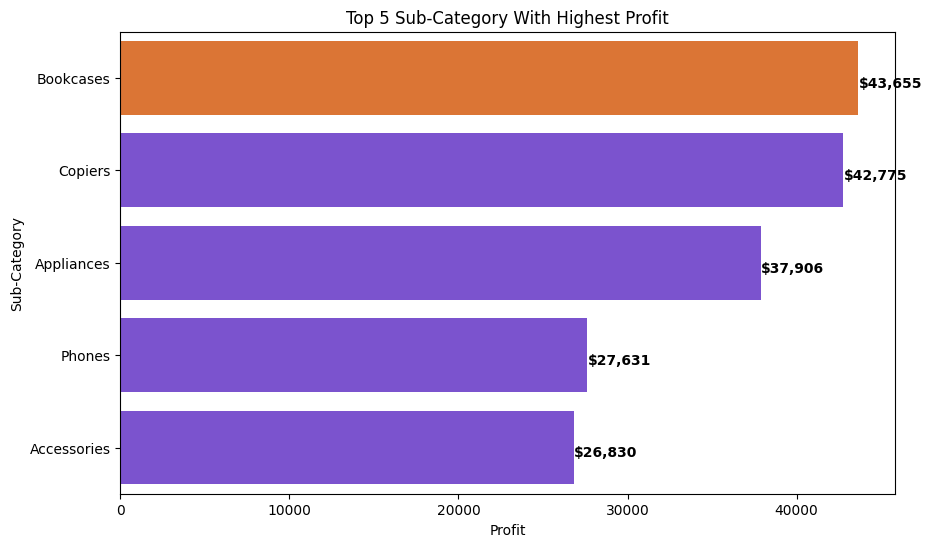

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Top 5 Sub-Category With Highest Profit')
sns.barplot(x='Profit', 
            y='Sub-Category', 
            data=df_profit, 
            palette=['#F66E1A', '#743EE3', '#743EE3', '#743EE3', '#743EE3' ]) 

for i, v in enumerate(df_profit['Profit']):
    ax.text(v + 10, i + .1, '${:,.0f}'.format(v), color='black', fontweight='bold')
    
plt.show()  

#### Insight:
Dalam rangka meningkatkan profitabilitas, perlu memperhatikan segala aspek yang relevan. Salah satunya adalah dengan membandingkan antara tingkat profit dan penjualan. Meski demikian, pada grafik di atas, fokus diberikan pada penjualan dengan nilai tertinggi. Hal ini dikarenakan adanya banyak produk yang dijual. Oleh karena itu, kami membagi 5 produk dengan penjualan tertinggi dari keseluruhan produk yang tersedia.

#### Analisis:
Berdasarkan data yang diberikan, sub-kategori dengan tingkat profit tertinggi adalah Bookcases dengan total profit sebesar 43655. Hal ini menunjukkan bahwa meskipun jumlah produk yang dijual tidak sebanyak produk di sub-kategori lainnya, tetapi produk Bookcases memiliki margin keuntungan yang tinggi.

Sebagai perusahaan, penting untuk mempertimbangkan faktor-faktor yang dapat mempengaruhi margin keuntungan, seperti biaya produksi, biaya pemasaran, dan harga jual. Dalam kasus ini, mungkin saja perusahaan telah berhasil mengelola biaya produksi dan pemasaran secara efektif sehingga mampu memperoleh margin keuntungan yang lebih tinggi daripada sub-kategori lainnya, kami harus mendalami lebih dalam hal terkait apakah produk Bookcases bisa untuk meningkatkan penjualan atau tidak.

#### Rekomendasi:
1. Melakukan analisis lebih dalam mengenai produk Bookcase
2. Mempertimbangkan apakah produk bookcase memiliki potensi ekspansi pasar karena berdasarkan data, jelas produk ini menghasikan profit terbesar

In [12]:
sales_by_month = df.groupby(['Sub-Category', 'Year', 'Month'])[['Sales']].sum().reset_index()
sales_df = sales_by_month[['Sub-Category', 'Year', 'Month', 'Sales']]
sales_df

,Sub-Category,Year,Month,Sales
0,Accessories,2011,1,583
1,Accessories,2011,2,44
2,Accessories,2011,3,371
3,Accessories,2011,4,729
4,Accessories,2011,5,1777
...,...,...,...,...
794,Tables,2014,7,2279
795,Tables,2014,8,3161
796,Tables,2014,9,3363
797,Tables,2014,10,610


In [13]:
bookcase_df= sales_df[sales_df['Sub-Category'] == 'Bookcases']
bookcase_df

,Sub-Category,Year,Month,Sales
190,Bookcases,2011,1,3373
191,Bookcases,2011,2,5650
192,Bookcases,2011,3,4226
193,Bookcases,2011,4,719
194,Bookcases,2011,5,3139
195,Bookcases,2011,6,9051
196,Bookcases,2011,7,406
197,Bookcases,2011,8,4839
198,Bookcases,2011,9,6672
199,Bookcases,2011,10,3073


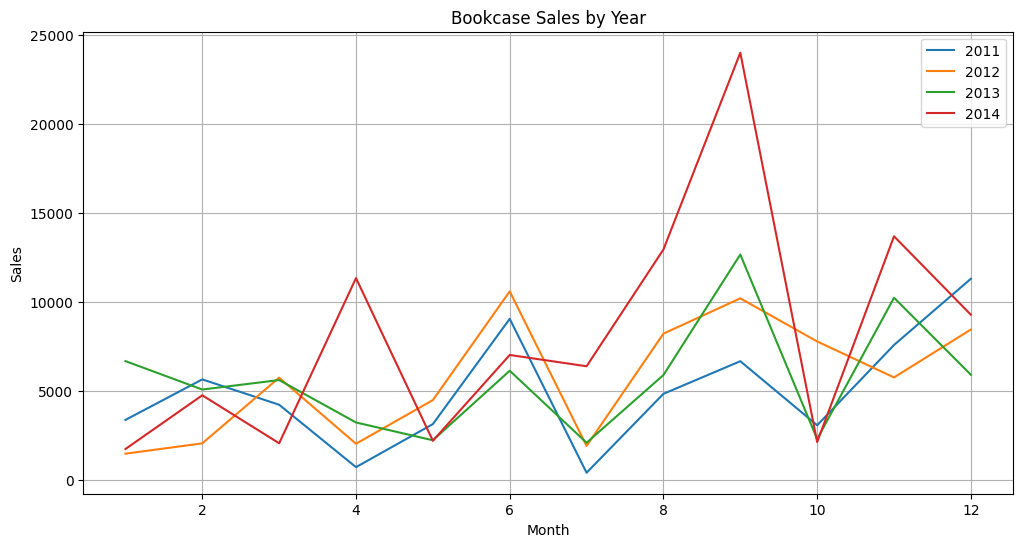

In [14]:
sales_pivot = bookcase_df.pivot(index='Month', columns='Year', values='Sales')

fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(sales_pivot.index, sales_pivot[2011], label='2011')
plt.plot(sales_pivot.index, sales_pivot[2012], label='2012')
plt.plot(sales_pivot.index, sales_pivot[2013], label='2013')
plt.plot(sales_pivot.index, sales_pivot[2014], label='2014')


plt.title('Bookcase Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.legend()
ax.grid(True)
plt.show()

#### Analisis
Variasi Penjualan Bulanan: Penjualan rak buku bervariasi secara signifikan dari bulan ke bulan. Misalnya, pada tahun 2011, penjualan untuk bulan Januari dan Februari adalah 3373 dan 5650, sementara penjualan pada bulan April hanya 719. Ada juga beberapa kasus di mana angka penjualan dalam satu bulan jauh lebih tinggi daripada bulan sebelumnya atau berikutnya.

Variasi Musiman: Terlihat ada beberapa variasi musiman dalam penjualan rak buku. Secara umum, angka penjualan lebih tinggi pada pertengahan tahun (Juni hingga September) dan lebih rendah pada awal dan akhir tahun. Misalnya, pada tahun 2011, angka penjualan untuk bulan Juni hingga September secara konsisten lebih tinggi daripada angka penjualan pada lima bulan pertama dan dua bulan terakhir tahun tersebut.

Tren Penjualan Keseluruhan: Dari data, terlihat bahwa penjualan rak buku untuk sub-kategori ini cenderung meningkat dari waktu ke waktu, dengan beberapa pengecualian. Misalnya, angka penjualan pada tahun 2011 umumnya lebih rendah daripada angka penjualan pada tahun 2012 dan 2013. Namun, terjadi penurunan penjualan pada tahun 2014 dibandingkan dengan tahun sebelumnya.

#### Rekomendasi
1. Memperhatikan Variasi Penjualan Bulanan: Variasi penjualan bulanan yang signifikan menunjukkan adanya faktor-faktor yang mempengaruhi permintaan dan pasokan produk. Oleh karena itu, perusahaan dapat memperhatikan faktor-faktor tersebut dan mengoptimalkan strategi bisnisnya. Misalnya, perusahaan dapat meningkatkan promosi pada bulan-bulan dengan penjualan yang rendah, menyesuaikan produksi dengan permintaan pelanggan, atau menawarkan diskon untuk produk tertentu selama bulan-bulan tertentu.

2. Memperhatikan Variasi Musiman: Variasi musiman yang signifikan menunjukkan adanya tren permintaan pada waktu tertentu dalam setahun. Oleh karena itu, perusahaan dapat mempersiapkan strategi bisnis yang sesuai untuk mengoptimalkan penjualan pada waktu-waktu tersebut. Misalnya, perusahaan dapat meningkatkan persediaan pada musim-musim yang lebih tinggi permintaannya atau mengalokasikan lebih banyak sumber daya pemasaran pada waktu-waktu tersebut.

3. Memperhatikan Tren Penjualan Keseluruhan: Tren penjualan keseluruhan menunjukkan arah yang diambil penjualan suatu produk. Perusahaan dapat memperhatikan tren tersebut untuk membuat keputusan bisnis yang tepat dan mengoptimalkan penjualan produk. Misalnya, perusahaan dapat menyesuaikan strategi produksi untuk meningkatkan quantitas barang pada saat permintaan meningkat atau menawarkan produk yang lebih inovatif atau berbeda dari pesaing untuk mempertahankan pangsa pasar.

In [15]:
quantity_by_month = df.groupby(['Sub-Category', 'Year', 'Month'])[['Quantity']].sum().reset_index()
quantity_df = quantity_by_month[['Sub-Category', 'Year', 'Month', 'Quantity']]
quantity_df

,Sub-Category,Year,Month,Quantity
0,Accessories,2011,1,5
1,Accessories,2011,2,2
2,Accessories,2011,3,3
3,Accessories,2011,4,22
4,Accessories,2011,5,12
...,...,...,...,...
794,Tables,2014,7,8
795,Tables,2014,8,9
796,Tables,2014,9,10
797,Tables,2014,10,2


In [16]:
book_quantity_df= quantity_df[quantity_df['Sub-Category'] == 'Bookcases']
book_quantity_df.head()

,Sub-Category,Year,Month,Quantity
190,Bookcases,2011,1,21
191,Bookcases,2011,2,18
192,Bookcases,2011,3,11
193,Bookcases,2011,4,5
194,Bookcases,2011,5,19


In [17]:
avg_quantity = book_quantity_df.groupby(['Year','Month'])[['Quantity']].sum()
avg_quantity_permonth = avg_quantity.unstack('Year')
avg_quantity_permonth['Mean'] = round(avg_quantity_permonth.mean(axis=1),0)
avg_quantity_permonth

Quantity                 Mean
Year      2011 2012 2013 2014      
Month                              
1           21    9   36    6  18.0
2           18    9   21   22  18.0
3           11   32   29    5  19.0
4            5    8   18   63  24.0
5           19   14   10   17  15.0
6           44   37   28   41  38.0
7            4   14    9   35  16.0
8           31   33   34   84  46.0
9           37   53   58   85  58.0
10          14   35   15   12  19.0
11          32   28   48   79  47.0
12          54   44   28   37  41.0

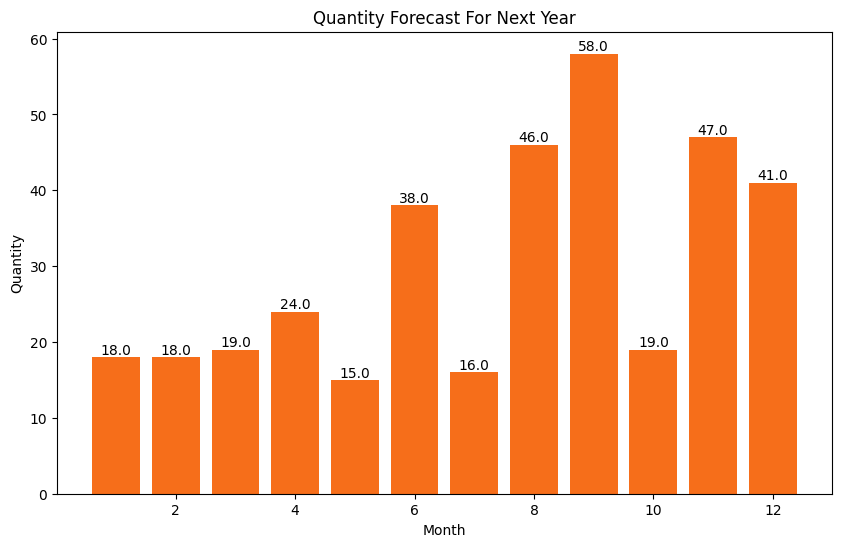

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
x = avg_quantity_permonth.index
y = avg_quantity_permonth['Mean']
bars = ax.bar(x, y, color='#F66E1A')

plt.title('Quantity Forecast For Next Year')
plt.xlabel('Month')
plt.ylabel('Quantity')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()


### Analisis
Grafik diatas yang merupakan bar dari rata-rata kuantitas stok bookcase selama 4 tahun dari 2011-2014.Dapat dilihat bahwa rata-rata kuantitas stock bookcase mengalami peningkatan dari awal hingga akhir tahun. Namun, perlu dicatat bahwa peningkatan ini tidak selalu stabil. Terlihat bahwa terdapat fluktuasi yang cukup signifikan dari antar bulan.  Stok barang pada awal tahun stabil dan kebutuhan stok rendah, namun setelah pertengan tahun mulai terjadi fluktuasi kebutuhan kuantitas yang cukup tinggi hingga akhir tahun, salah satu penyebabnya adalah adalah dimulainya tahun ajaran baru dimana banayak siswa sekolah atau mahasiswa membutuhkan bookcase baru untu meletakan buku yang jumlahnya bertambah. 

### Rekomendasi
Rekomendasi untuk penyediaan stock tahun depan adalah dengan mempertimbangkan fluktuasi permintaan pada tahun-tahun sebelumnya. Pada tahun-tahun yang kuantitas stock bookcasenya lebih tinggi dari rata-rata, maka perusahaan dapat meningkatkan persediaannya, sementara pada tahun-tahun yang kuantitas stock bookcasenya lebih rendah dari rata-rata, perusahaan dapat menurunkan persediaannya. Dalam hal ini, perusahaan perlu memperhatikan data dari beberapa tahun sebelumnya untuk menentukan tren jangka panjang dan membuat keputusan yang lebih tepat. Selain itu, perusahaan juga dapat mempertimbangkan faktor-faktor seperti perkiraan pertumbuhan penjualan, persaingan di pasar, dan faktor ekonomi untuk membuat keputusan yang lebih baik mengenai penyediaan stock pada tahun depan.

In [19]:
df_low_profit= df.groupby(['Sub-Category']).sum()['Profit'].reset_index().sort_values('Profit',ascending=False).tail(5)
df_low_profit


C:\Users\muham\AppData\Local\Temp\ipykernel_13288\2849301557.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_low_profit= df.groupby(['Sub-Category']).sum()['Profit'].reset_index().sort_values('Profit',ascending=False).tail(5)


,Sub-Category,Profit
15,Supplies,6853
7,Envelopes,6463
8,Fasteners,3420
10,Labels,2636
16,Tables,-20731


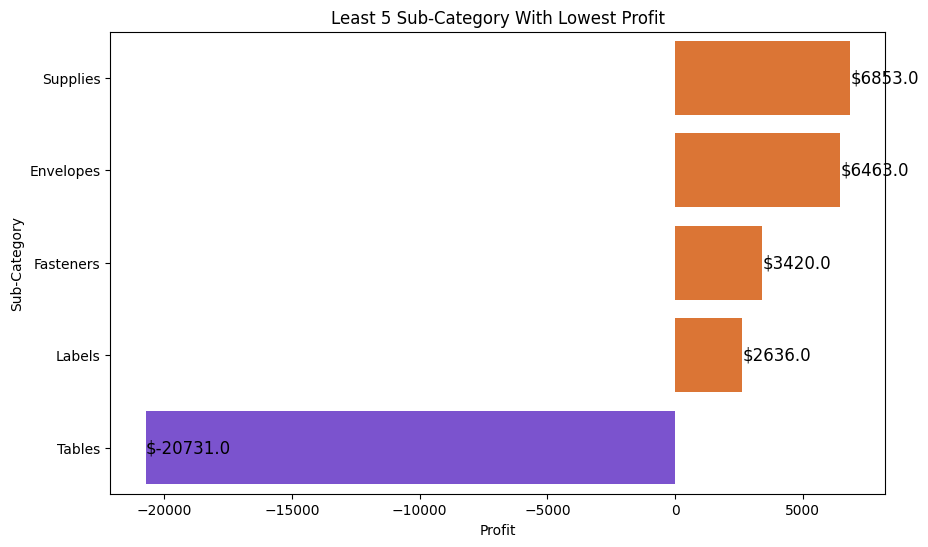

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Least 5 Sub-Category With Lowest Profit')
bars = sns.barplot(x='Profit', 
                   y='Sub-Category', 
                   data=df_low_profit, 
                   palette=['#F66E1A', '#F66E1A', '#F66E1A', '#F66E1A', '#743EE3' ]) 


for bar in bars.containers:
    for value in bar:
        x_pos = value.get_width()
        y_pos = value.get_y() + value.get_height() / 2
        ax.text(x_pos, y_pos, '$'+str(round(x_pos, 2)), va='center', ha='left', fontsize=12)

plt.show()


### Analisis:

Sub-kategori "Tables" menghasilkan kerugian sebesar -20731, sedangkan sub-kategori lainnya menghasilkan keuntungan.
Hal ini menunjukkan bahwa penjualan produk dalam sub-kategori "Tables" tidak menguntungkan bagi bisnis.

### Rekomendasi:

Berdasarkan analisis di atas, direkomendasikan untuk tidak menjual produk dalam sub-kategori "Tables" lagi.
Bisnis dapat mempertimbangkan untuk mengevaluasi kembali strategi penjualan mereka dan memfokuskan pada produk-produk lain yang lebih menguntungkan.
Jika tetap ingin menjual produk dalam sub-kategori "Tables", bisnis dapat mencari cara untuk meningkatkan keuntungan dari produk tersebut, misalnya dengan mengurangi biaya produksi atau menaikkan harga jual. Namun, perlu diingat bahwa keputusan untuk tetap menjual produk dalam sub-kategori "Tables" harus didukung oleh analisis yang lebih detail dan strategi yang matang.

![Jupyter Notebook Logo](https://cdn.discordapp.com/attachments/1095229766690426950/1096245676767199344/Sheet_10.png)

Peta persebaran profit penjualan Bookcase

In [46]:
profit_by_country = df[df['Sub-Category']=='Bookcases'].groupby('Country')[['Profit']].sum().sort_values('Profit',ascending=False)

profit_by_country.reset_index().head(3)

,Country,Profit
0,United Kingdom,14455
1,Italy,10924
2,Germany,10481


In [38]:
book_quantity_df= quantity_df[quantity_df['Sub-Category'] == 'Bookcases']
book_quantity_df.head()

,Sub-Category,Year,Month,Quantity
190,Bookcases,2011,1,21
191,Bookcases,2011,2,18
192,Bookcases,2011,3,11
193,Bookcases,2011,4,5
194,Bookcases,2011,5,19


In [21]:
data = {'Country': [ 'Rumania', 'Türkiye','Rusia',],
        'Population': [ 19.04, 84.68,146],
        }

df_population = pd.DataFrame(data)
df_population

,Country,Population
0,Rumania,19.04
1,Türkiye,84.68
2,Rusia,146.00


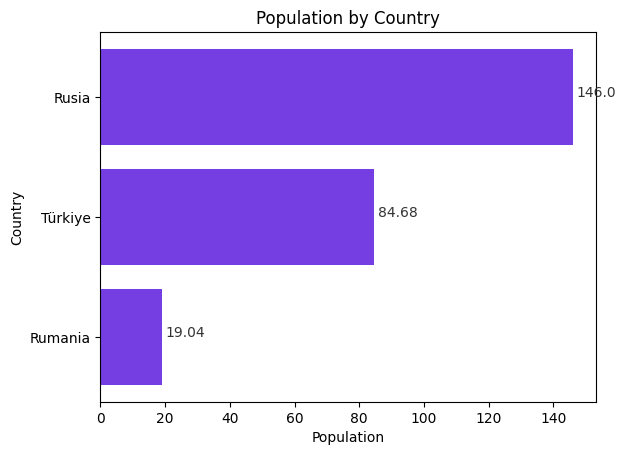

In [22]:


plt.barh(y='Country', width='Population', data=df_population, color='#743EE3')


for i, v in enumerate(df_population['Population']):
    plt.text(v + 1, i, str(v), color='#333333')


plt.title('Population by Country')
plt.xlabel('Population')
plt.ylabel('Country')


plt.show()

### Rekomendasi
mencari negara dengan karakteristik sama dan sebagai negara target ekspansi, 3 negara diatas merupakan  negara yang masuk kedalam 10 besar negara dengan penduduk tertinggi di Eropa yang belum di ekspansi oleh perusahaan, dan memiliki memiliki tingkat literasi yang hampir sama.

In [23]:
Sub_cat_sales = df[['Sub-Category','Sales']].groupby('Sub-Category')[['Sales']].sum().reset_index().sort_values(by='Sales')
least_5 = Sub_cat_sales.head(5).sort_values("Sales", ascending=False).reset_index(drop = True)
least_5

,Sub-Category,Sales
0,Supplies,38824
1,Paper,36057
2,Envelopes,31210
3,Fasteners,16238
4,Labels,12822


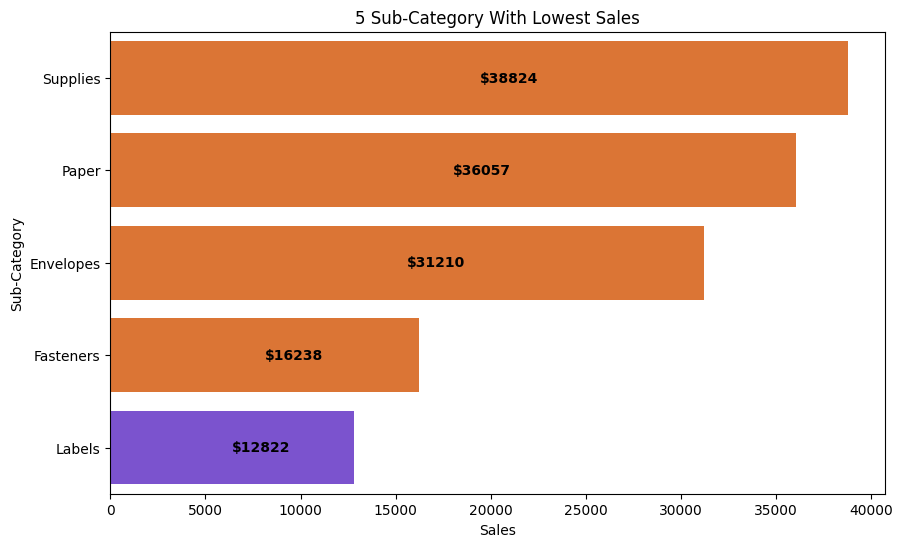

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('5 Sub-Category With Lowest Sales')

plot = sns.barplot(x='Sales', 
                   y='Sub-Category', 
                   data=least_5, 
                   palette=['#F66E1A', '#F66E1A', '#F66E1A', '#F66E1A','#743EE3' ])

for i in range(len (least_5['Sub-Category'])):
    plt.text(least_5["Sales"][i]/2, i, '$'+ str(least_5["Sales"][i]), ha='left', va='center', fontweight='bold')

plt.show()


#### Insight:
sesuai dengan tema untuk meningkatkan profitabilitas segala aspek harus di perhatikan salah satunya dari membandingkan antara profit dan sales namun untuk dalam grafik diatas memfokuskan tentang sales dengan grafis terendah, namun karena banyaknya produk yang dijual saya membagi 5 terendah dari seluruh produk yang tersedia.

#### Analisis:
Dari hasil membandingkan diantara Sales & Profitabilitas dapat diketahui bahwa untuk produk yang paling sedikit untuk angka Sales yang di miliki adalah Labels, dalam tujuan kami yaitu meningkatkan profitabilitas salah satunya dengan meningkatkan penjualan dengan Sales terendah namun aspek tersebut bukan salah satu alasan meningkatkan profitabilitas, kami harus mendalami lebih dalam hal terkait apakah produk Labels bisa untuk meningkatkan penjualan atau tidak.

#### Rekomendasi:
1. Untuk meyakinkan penjualan pada produk Labels tepat, di sediakan grafik korelasi untuk menguatkan argument bahwa produk tersebut dapat dijual
2. karena selisih dari produk lainnya sangat jauh dengan Labels maka untuk menghindari jeda jarak diantara jumlah produk lainnya, produk Labels akan ditingkatkan dengan penjualannya.

In [25]:
corr1 = df.groupby('Sub-Category')[['Sales','Discount']].sum().reset_index()
corr1

,Sub-Category,Sales,Discount
0,Accessories,131309,23.40
1,Appliances,209900,28.10
2,Art,127184,83.40
3,Binders,78934,74.50
4,Bookcases,294396,45.40
5,Chairs,186698,77.90
6,Copiers,290081,38.05
7,Envelopes,31210,24.80
8,Fasteners,16238,36.20
9,Furnishings,68237,40.90


In [26]:
corr2 = df.groupby('Sub-Category')[['Order ID']].nunique().reset_index()
corr2

,Sub-Category,Order ID
0,Accessories,348
1,Appliances,231
2,Art,1001
3,Binders,927
4,Bookcases,361
5,Chairs,370
6,Copiers,356
7,Envelopes,333
8,Fasteners,340
9,Furnishings,372


In [27]:
merge_df_outer = pd.merge(left=corr1, right=corr2, how='outer')
merge_df_outer.corr()

C:\Users\muham\AppData\Local\Temp\ipykernel_13288\3280107160.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merge_df_outer.corr()


,Sales,Discount,Order ID
Sales,1.000000,0.487477,0.139491
Discount,0.487477,1.000000,0.746748
Order ID,0.139491,0.746748,1.000000


C:\Users\muham\AppData\Local\Temp\ipykernel_13288\3800293041.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merge_df_outer.corr(), annot=True)


<Axes: >

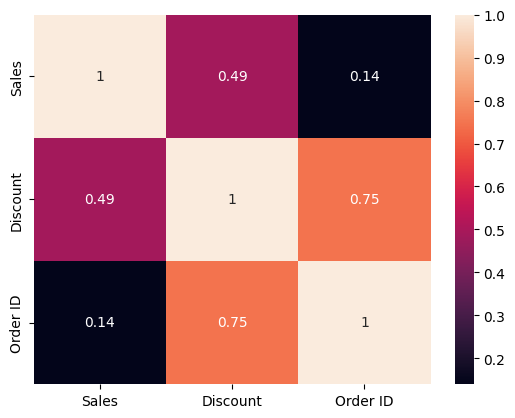

In [28]:
sns.heatmap(merge_df_outer.corr(), annot=True)

#### Insight:
Dari menghasilkan produk terendah yang terdapat dari grapic sebelum ini, untuk memperkuat argument bahwa apa yang diduga itu kuat, kami mencari korelasi antara kolom Sales, Discount maupun dengan Order ID.

#### Analysis:
Dari grapic korelasi diatas tercipta argument yang kuat terkait perbandingan diantara Discount yang diberikan dengan jumlah Order yang muncul ternyata saling berkesinambungan untuk menaikan penjualan yaitu dimana product yang diberikan discount tinggi meningkatkan Sales dari produk yang tersedia akan tinggi juga angkanya.

#### Rekomendasi:
1. Setelah mendapatkan analisis terkait grapic diatas bahwa kami percaya untuk menaikan penjualan dari produk Labels
2. Karena memang kebutuhan dari barang perkantoran tinggi kedepannya Labels akan dijual di area-area yang belum tersedia

In [29]:
df.head(2)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month,Cost,Cost per Quantity
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,"Enermax Note Cards, Premium",0.5,45,-26,3,False,2011,1,71,23
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,...,"Dania Corner Shelving, Traditional",0.0,854,290,7,True,2011,1,564,80


In [30]:
df['Feedback?'] = df['Feedback?'].map({True: 1, False: 0})

In [31]:
df.head(3)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month,Cost,Cost per Quantity
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,"Enermax Note Cards, Premium",0.5,45,-26,3,0,2011,1,71,23
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,...,"Dania Corner Shelving, Traditional",0.0,854,290,7,1,2011,1,564,80
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,...,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,1,2011,1,119,39


In [32]:
sales_df

,Sub-Category,Year,Month,Sales
0,Accessories,2011,1,583
1,Accessories,2011,2,44
2,Accessories,2011,3,371
3,Accessories,2011,4,729
4,Accessories,2011,5,1777
...,...,...,...,...
794,Tables,2014,7,2279
795,Tables,2014,8,3161
796,Tables,2014,9,3363
797,Tables,2014,10,610


In [33]:
labels_df= sales_df[sales_df['Sub-Category'] == 'Labels']
labels_df.head()

,Sub-Category,Year,Month,Sales
475,Labels,2011,1,186
476,Labels,2011,2,31
477,Labels,2011,3,107
478,Labels,2011,4,266
479,Labels,2011,5,61


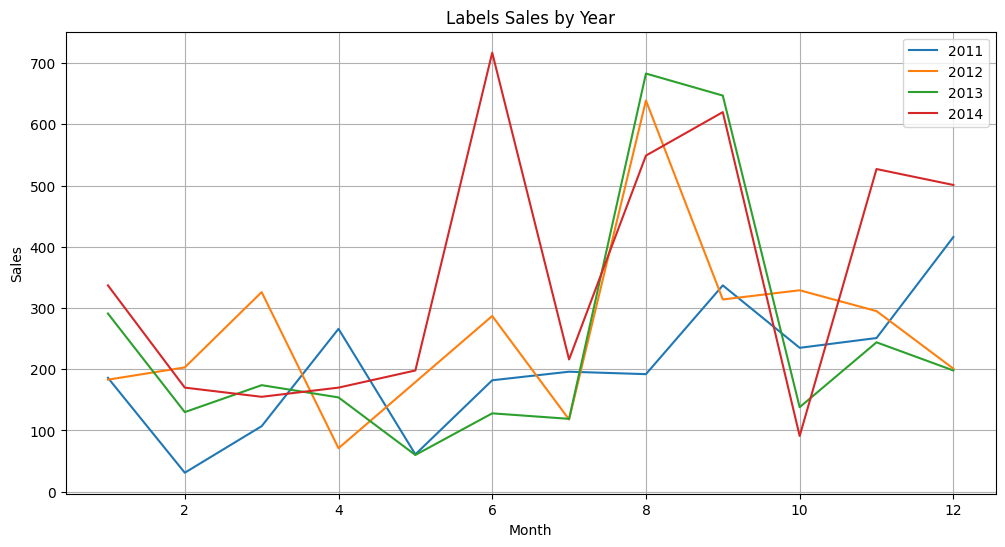

In [34]:
sales_pivot = labels_df.pivot(index='Month', columns='Year', values='Sales')

fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(sales_pivot.index, sales_pivot[2011], label='2011')
plt.plot(sales_pivot.index, sales_pivot[2012], label='2012')
plt.plot(sales_pivot.index, sales_pivot[2013], label='2013')
plt.plot(sales_pivot.index, sales_pivot[2014], label='2014')


plt.title('Labels Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.legend()
ax.grid(True)
plt.show()

### Analisis
Kenapa Labels tidak memiliki Sales paling sedikit diantara produk yang lain, berdasarkan hasil dari pengecekan grafic diantara setiap tahunnya ternyata Category Labels tidak memiliki konsistensi kenaikan Sales setiap tahunnya terlihat dari awal tahun sampai dengan periode tersebut dibandingkan dengan setiap tahunnya dari tahun 2011 sampai dengan 2014.

### Rekomendasi
Karena setelah kami cek ternyata dari tahun 2011 sampai dengan 2014 untuk Sub-Category memiliki discount yang kecil untuk meningkatkan Sales dalam jumlah yang tinggi di periode berikutnya strategi untuk meningkatkan Sales yaitu dengan memberikan discount extra terhadap Sub-Category Labels.